# Predicting demand for shared bikes organization - BoomBikes

##### **Business Context**

In this case study we’ll be predicting the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19 with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. The model will be a good way for management to understand the demand dynamics of a new market after the Covid-19 panademic ends.

**Business Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [77]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Read the dataset and check the first five rows
boombikes = pd.read_csv('day.csv')
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [80]:
#Check the shape of the dataframe
boombikes.shape

(730, 16)

# Data Handling and Cleaning

##### **There are no extra rows & columns in the dataset to delete which consists of Header/Footer**

In [83]:
# Check the datatypes of all the columns of the dataframe
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
# No duplicate rows based on instant variable
boombikes[boombikes.duplicated(['instant'])]
boombikes.isnull().all(axis=1).sum()

0

In [85]:
# Check the columns of the dataframe for the total number of nulls
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [86]:
boombikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [87]:
boombikes_dup = boombikes.copy()

# Checking for duplicates and dropping the duplicate row
boombikes_dup.drop_duplicates(subset=None, inplace=True)

print(f'Dataset Before Removing Duplicate Rows {boombikes.shape}')
print(f'Dataset After Removing Duplicate Rows {boombikes_dup.shape}')

Dataset Before Removing Duplicate Rows (730, 16)
Dataset After Removing Duplicate Rows (730, 16)


#### Filter Columns which are not relevant to the analysis

- **instant**: This column represents the row number, which is of no use for the analysis
- **dteday**: There are other columns avalibale in the dataset **yr & mnth** which can be used for the analysis 
- **casual**: This column data is already included in the target **cnt** column
- **registered**: This column data is already included in the target **cnt** column

In [89]:
# Drop the columns which do not contribute & the data is avialble in other columns
boombikes = boombikes.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [90]:
# Verify the total number of columns & nulls
boombikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Based on the columns information following Analysis will be performed on the dataset  
- Tranformation of the data
- Univariate analysis
- Segemented univariate analysis
- Bivariate analysis - We will conclude it from the univarite or segemented univariate analysis
- Perform Correlation -  On the numerical data/facts and drive the conclusions

In [92]:
# Massaging data for the columns which are not meaningful based on the data dictionary such as season, mnth

boombikes[['season']] = boombikes[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
boombikes[['mnth']] = boombikes[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))
boombikes[['weekday']] = boombikes[['weekday']].apply(lambda x : x.map({1:'Wed',2:'Thurs',3:'Fri',4:'Sat',5:'Sun',6:'Mon',0:'Tues'}))
boombikes[['weathersit']] = boombikes[['weathersit']].apply(lambda x : x.map({1:'clear & Few clouds',2:'mist & cloudy',3:'light snow, light rain & thunderstorm ',4:'heavy rain & ice pallets',}))

### Verifying the Outliers

##### From the below box plots it is clear that only two independent variables **windspeed** & **humidity** has some outliers and those are not of much significance, as most of the values are in the range of 26 - 28 for **windspeed** & for **humidity** we can simply ignore. Therefore, there are no outliers in the data

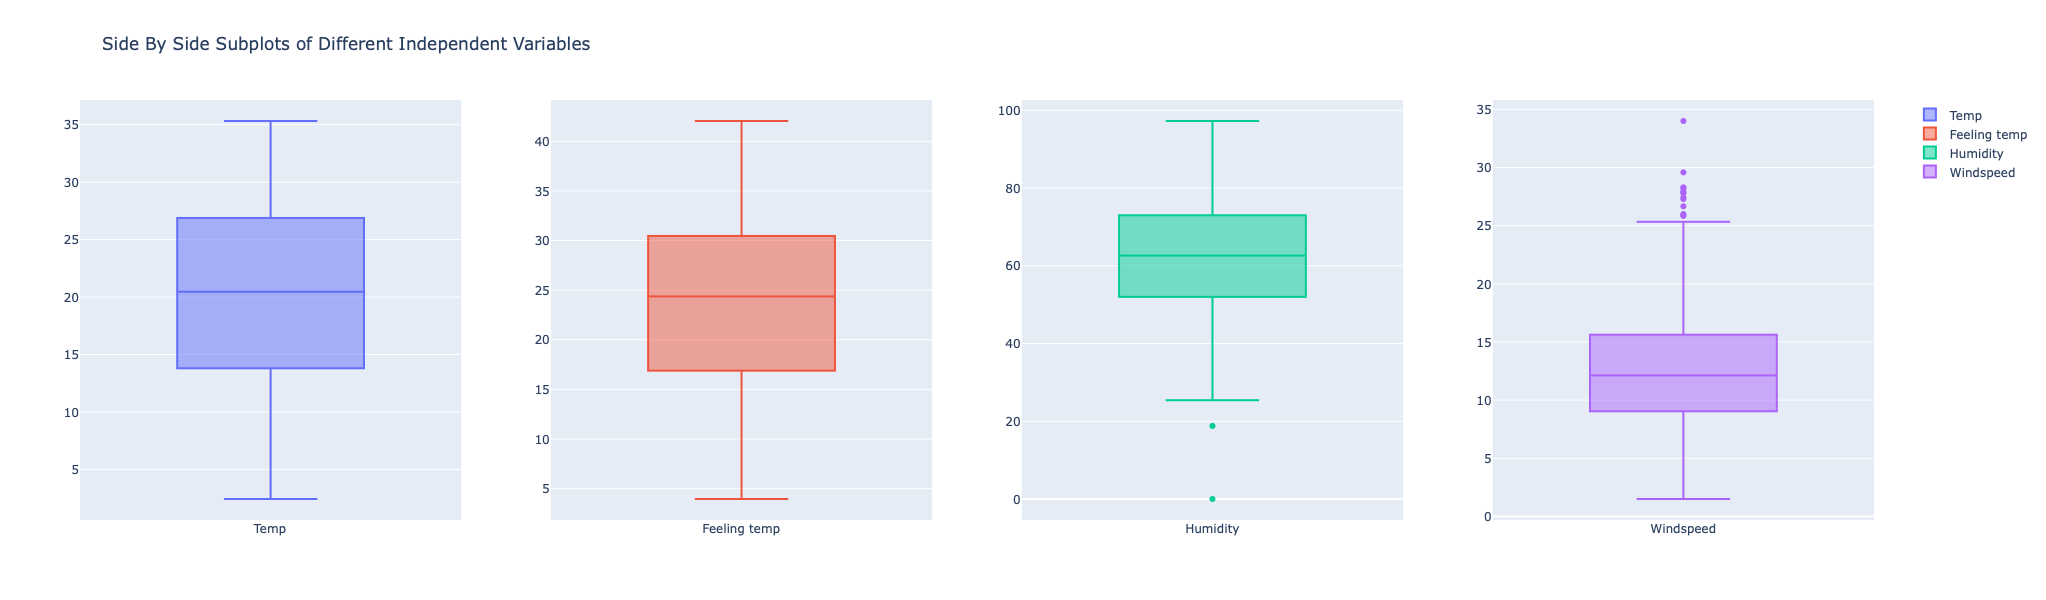

In [95]:
fig = make_subplots(rows=1, cols=4)

fig.add_trace(
    go.Box(y=boombikes['temp'], name='Temp'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=boombikes['atemp'], name='Feeling temp'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=boombikes['hum'], name='Humidity'),
    row=1, col=3
)

fig.add_trace(
    go.Box(y=boombikes['windspeed'], name='Windspeed'),
    row=1, col=4
)

fig.update_layout(height=600, width=1500, title_text="Side By Side Subplots of Different Independent Variables")
fig.show()

# Univariate Analysis

#### UA Analysis 1: Most of the humidity is the range of 45 - 75

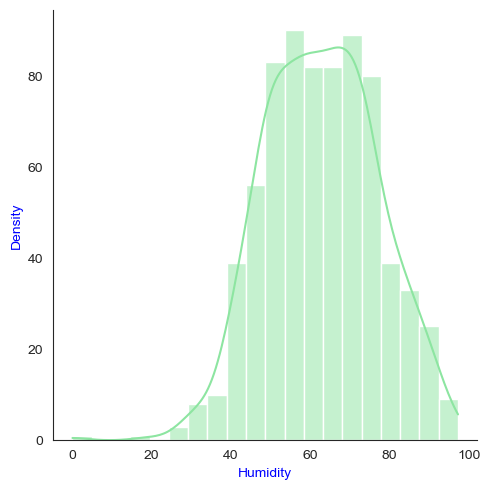

In [98]:
sns.set_style('white')
sns.displot(boombikes['hum'], bins=20, kde=True,color='#8de5a1')
plt.xlabel('Humidity', fontdict={'fontweight': '20', 'color': 'b'})
plt.ylabel('Density', fontdict={'fontweight': '20', 'color': 'b'})
plt.show()

#### UA Analysis 2: As expected count of working days is higher before Covid-19

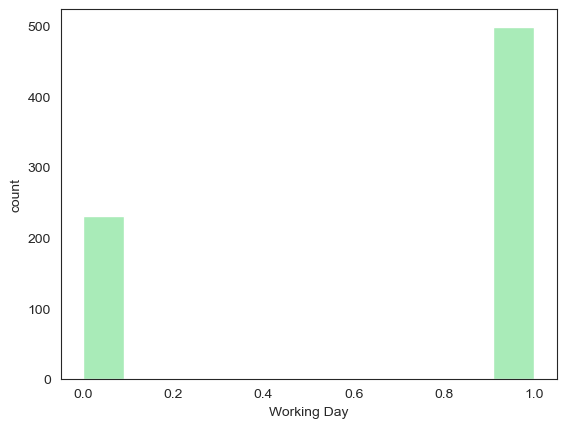

In [100]:
ax = sns.histplot(data = boombikes, x = 'workingday', color='#8de5a1')
ax.set_xlabel('Working Day')
ax.set_ylabel('count')
plt.show()

**Observation(s) realted to the Univariate analysis:**

1. Most of the humidity is the range of 45 - 75
2. As expected, count of working days is higher before Covid-19

# Segemented Univariate Analysis

#### SUA Analysis 1: It's clearly visible that across all seasons customers are utilizing bike services

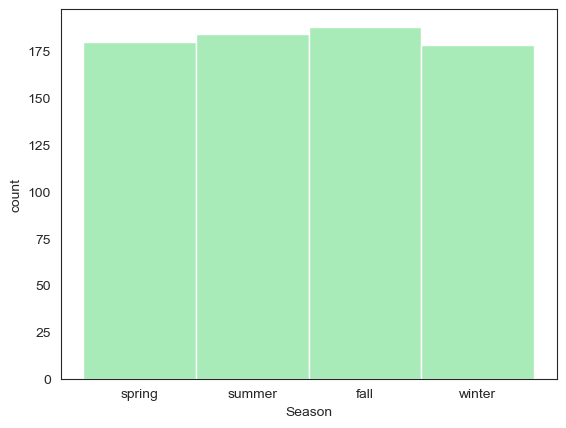

In [104]:
ax = sns.histplot(data = boombikes, x = 'season', color='#8de5a1')
ax.set_xlabel('Season')
ax.set_ylabel('count')
plt.show()

#### SUA Analysis 2: It's clearly visible that among all months: Jan, Mar, May, Jul, Aug, Oct, Dec has higher demand

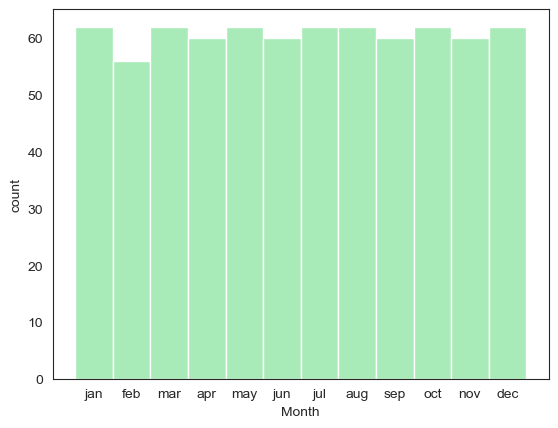

In [106]:
ax = sns.histplot(data = boombikes, x = 'mnth', color='#8de5a1')
ax.set_xlabel('Month')
ax.set_ylabel('count')
plt.show()

#### SUA Analysis 3: Almost same demand of bikes across each day

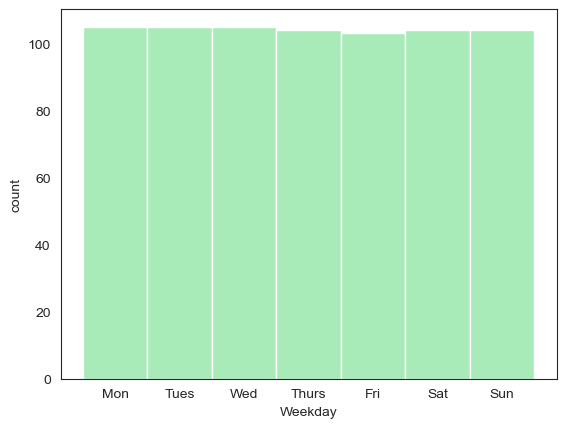

In [108]:
ax = sns.histplot(data = boombikes, x = 'weekday', color='#8de5a1')
ax.set_xlabel('Weekday')
ax.set_ylabel('count')
plt.show()

#### SUA Analysis 4: It's clearly visible that demand is higher during clear & Few clouds weather condition. Also no bikes were rented on during Heavy Rain + Ice Pallets weather situtaion

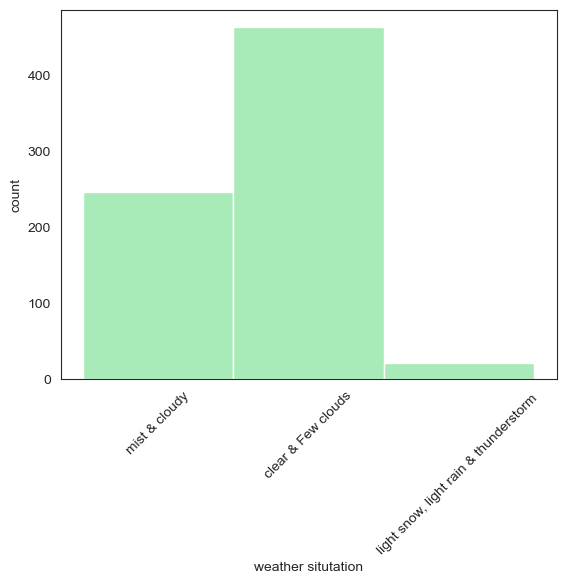

In [110]:
ax = sns.histplot(data = boombikes, x = 'weathersit', color='#8de5a1')
ax.set_xlabel('weather situtation')
ax.set_ylabel('count')
plt.xticks(rotation=45)
plt.show()

#### SUA Analysis 5: For both the years 2018 and 2019 each day the bikes were rented. Also, it makes clear that weather situation with Heavy Rain + Ice Pallets did not occur in these 2 years

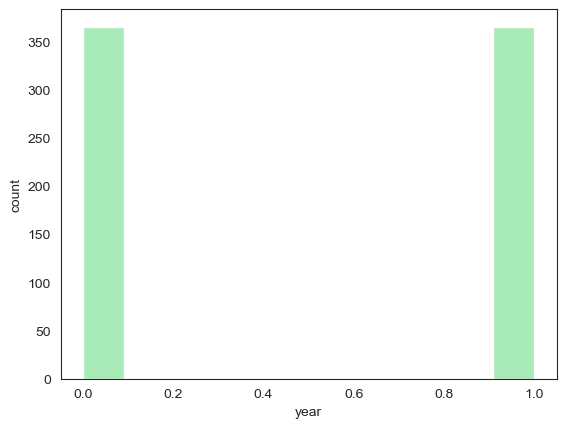

In [112]:
ax = sns.histplot(data = boombikes, x = 'yr', color='#8de5a1')
ax.set_xlabel('year')
ax.set_ylabel('count')
plt.show()

**Observation(s) realted to the Segemented Univariate analysis:**

**Weak link:**
1. Nothing from the observations

**Strong link:**
1. Almost same demand of bikes across each day; however which year contributes more we could find in Bivariate analysis
2. It's clearly visible that across all the seasons, customers are utilizing bike services
3. It's clearly visible that among all the months: Jan, Mar, May, Jul, Aug, Oct, Dec has higher demand
4. It's clearly visible that demand is higher during clear & Few clouds weather condition. Also no bikes were rented on during Heavy Rain + Ice Pallets weather situtaion
5. For both the years 2018 and 2019 each day the bikes were rented. Also, it makes clear that weather situation with Heavy Rain + Ice Pallets did not occur in these 2 years

# Bivariate Analysis

#### BA Analysis 1: 

**Weak Relation for Linear Regression:**
1. Between cnt and humidity
2. Between cnt and windspeed

**Strong Relation for Linear Regression:**
1. Between cnt & temp
2. Between cnt & atemp
3. temp & atemp - These two independent variables will lead to Multicolinearity

<Figure size 1800x300 with 0 Axes>

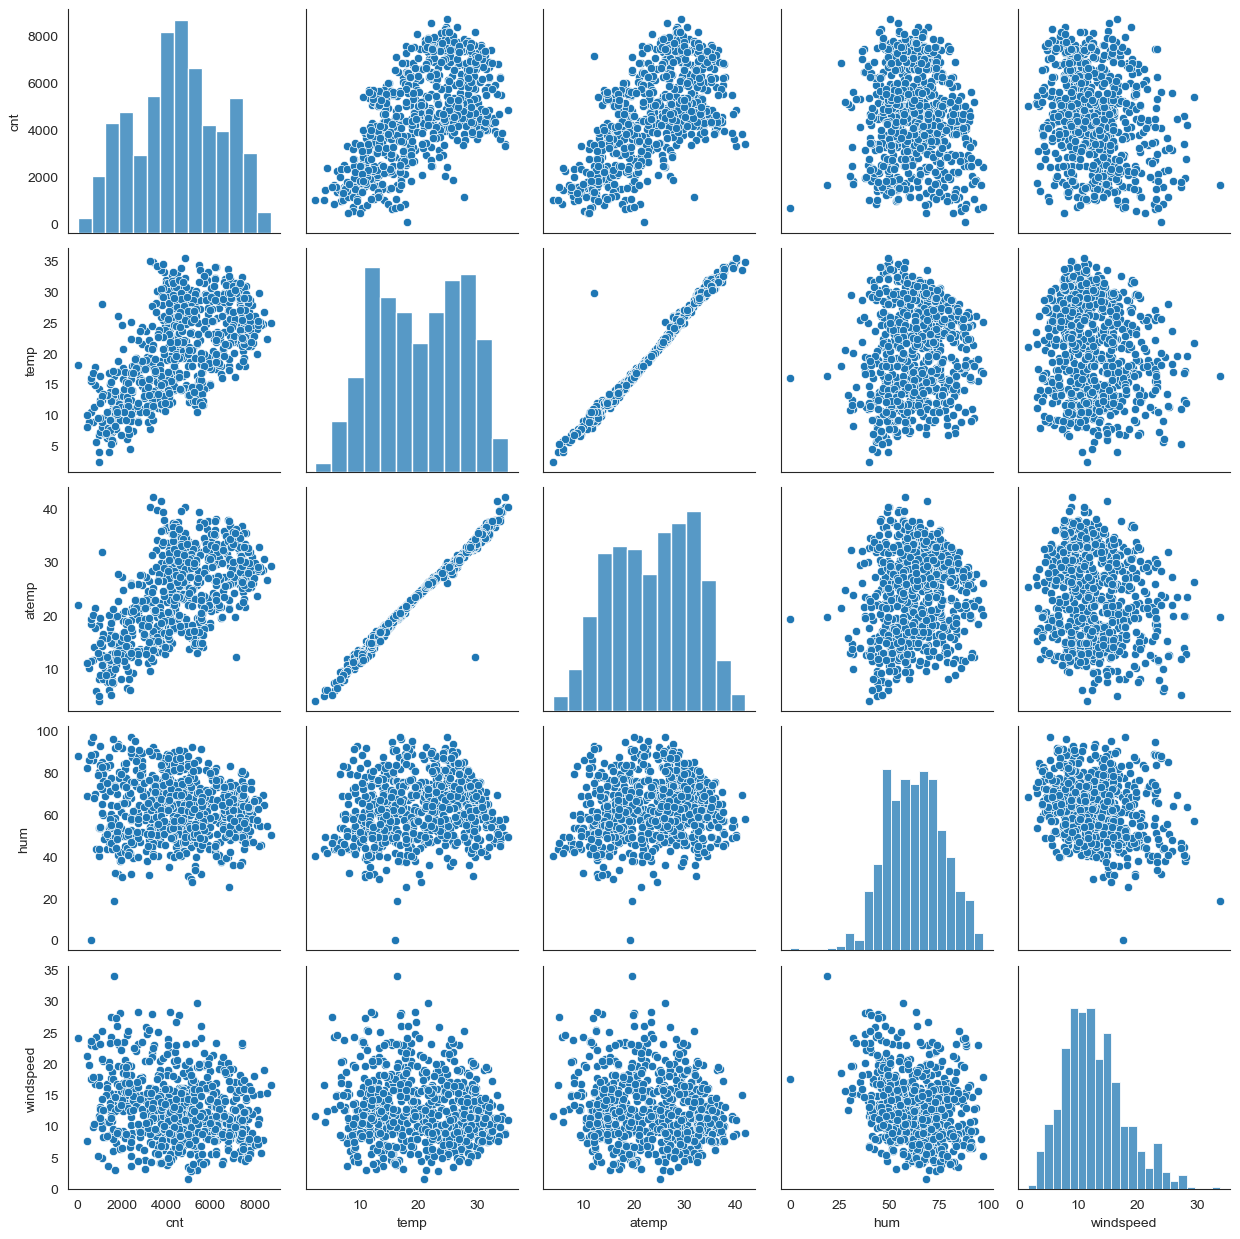

In [116]:
numeric_columns_without_categories = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (18, 3))
sns.pairplot(boombikes[numeric_columns_without_categories])
plt.tight_layout();
plt.show()

#### BA Analysis 2: 

**Negative Correlation:**
1. Between cnt and humidity
2. Between cnt and windspeed
3. Between cnt and holiday

**Positive Correlation:**
1. Between cnt & temp
2. Between cnt & atemp
3. Between cnt & yr

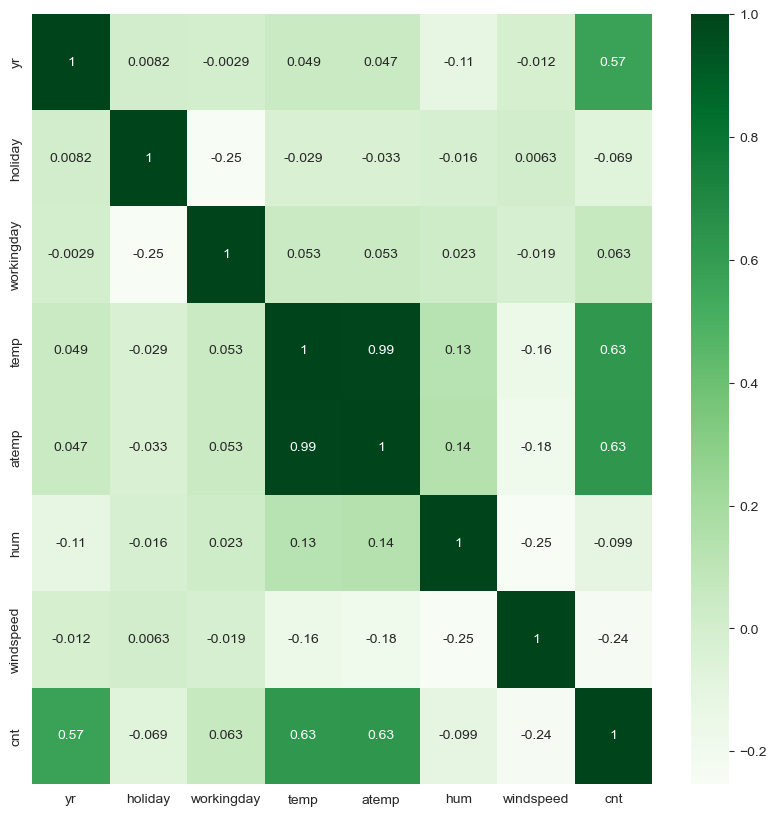

In [118]:
plt.figure(figsize = (10, 10))
sns.heatmap(boombikes.corr(), annot = True, cmap="Greens")
plt.show()

#### BA Analysis 3: 

1. Most number of bikes are booked in the months from June to October; However top 2 months are September & October  
2. Most number of bikes are booked on Monday, Friday & Saturday; however the median of all the days is close to 5000
3. Most number of bikes are booked during clear & few clouds season. With 75 percentile booking ~ 6500  
4. In year 2009 more bikes are booked as compared to the year 2008; This means booking of the bikes are on the increasing trend/year
5. More bikes are booked on Working days
6. Top 2 seasons for booking bikes are - Summer & Fall
7. During the spring season the number of booking falls


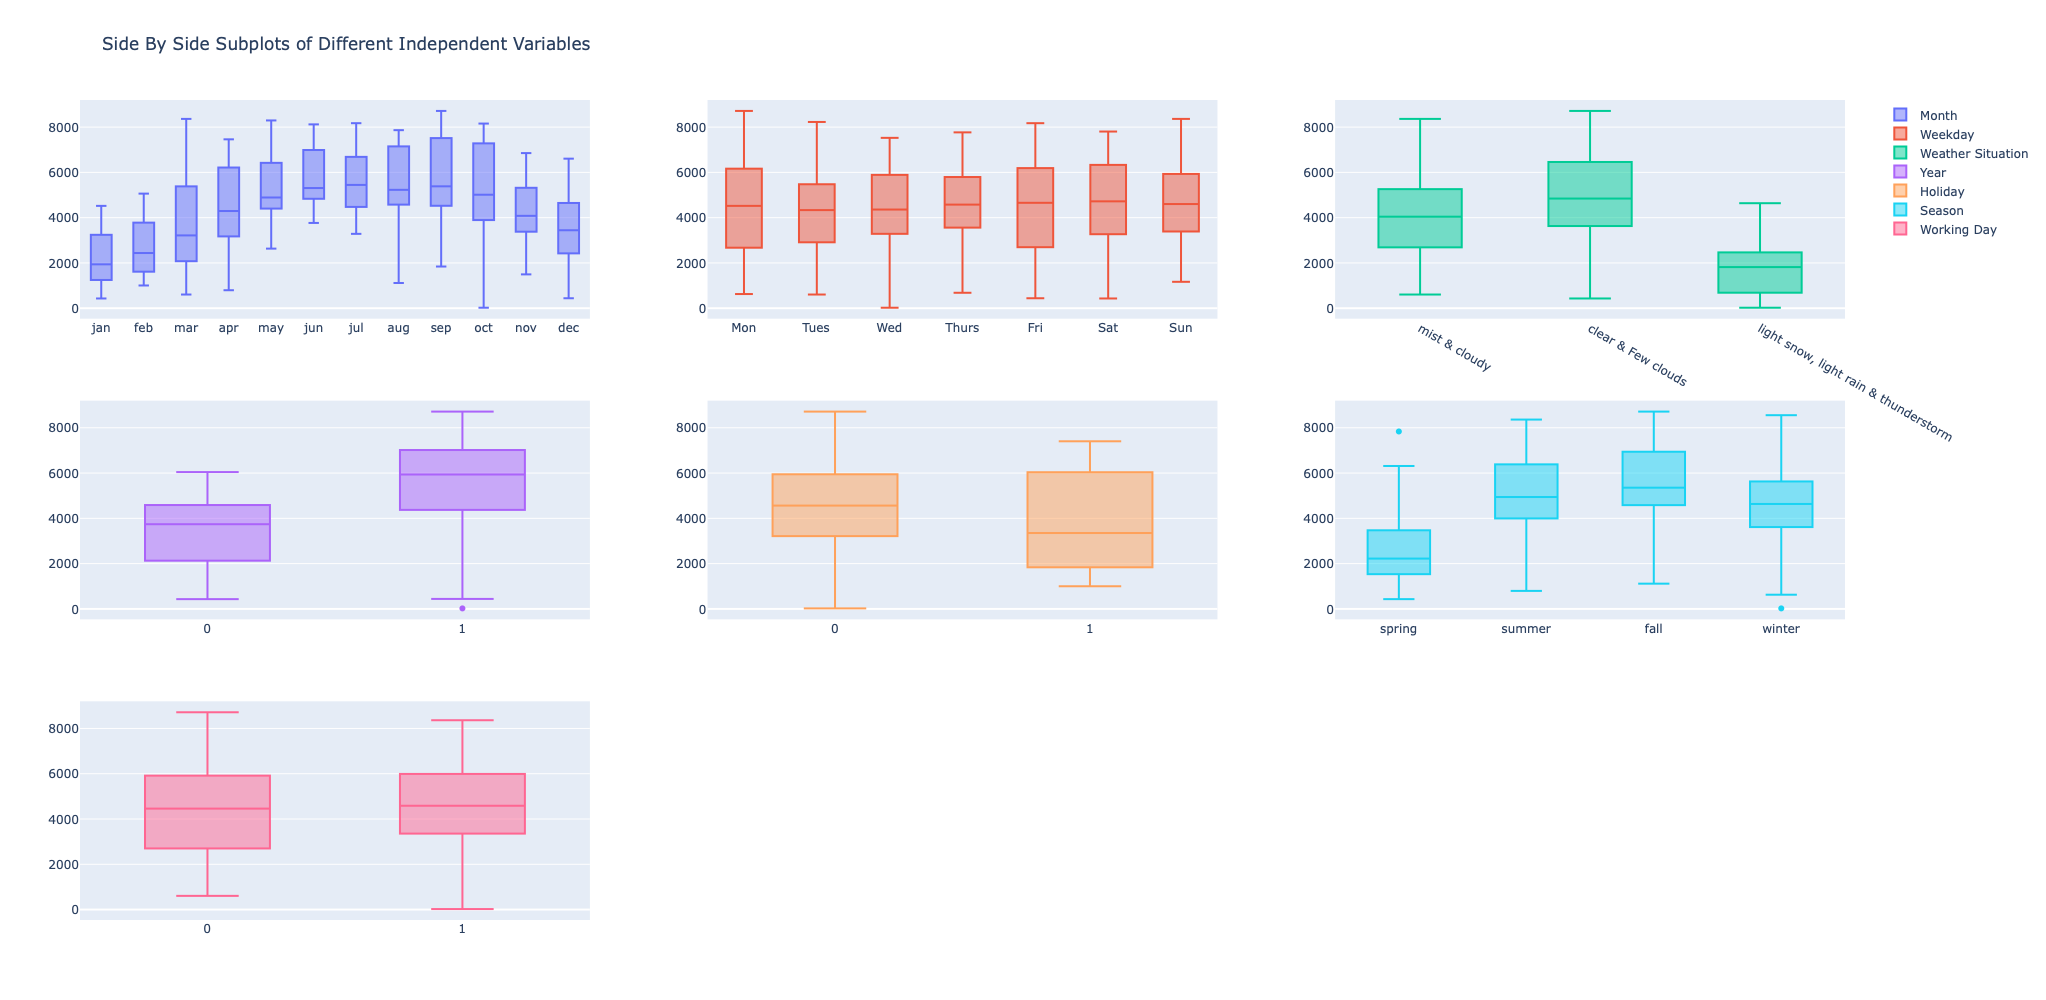

In [120]:
fig = make_subplots(rows=3, cols=3)

fig.add_trace(
    go.Box(x=boombikes['mnth'], y=boombikes['cnt'], name='Month'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=boombikes['weekday'], y=boombikes['cnt'], name='Weekday'),
    row=1, col=2
)

fig.add_trace(
    go.Box(x=boombikes['weathersit'], y=boombikes['cnt'], name='Weather Situation'),
    row=1, col=3
)

fig.add_trace(
    go.Box(x=boombikes['yr'], y=boombikes['cnt'], name='Year'),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=boombikes['holiday'], y=boombikes['cnt'], name='Holiday'),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=boombikes['season'], y=boombikes['cnt'], name='Season'),
    row=2, col=3
)

fig.add_trace(
    go.Box(x=boombikes['workingday'], y=boombikes['cnt'], name='Working Day'),
    row=3, col=1
)

fig.update_layout(height=1000, width=1500, title_text="Side By Side Subplots of Different Independent Variables")
fig.show()

**Observation(s) realted to the Bivariate analysis:**

1. temp or atemp should be consider as one of the predictor as they have a strong linear regression with the cnt
2. humidity & windspeed may not be the good predictors for the linear regression
3. season, months, days, year, holiday all are contributing towards the booking of the bikes 

# Creating Dummy Variables

In [123]:
# Convert the datatype of the dummy variables to integer
dummies_season_columns_with_segregation = pd.get_dummies(boombikes['season'], drop_first=True).astype(int)
boombikes = pd.concat([boombikes, dummies_season_columns_with_segregation], axis = 1)

dummies_month_columns_with_segregation = pd.get_dummies(boombikes['mnth'], drop_first=True).astype(int)
boombikes = pd.concat([boombikes, dummies_month_columns_with_segregation], axis = 1)

dummies_weekday_columns_with_segregation = pd.get_dummies(boombikes['weekday'], drop_first=True).astype(int)
boombikes = pd.concat([boombikes, dummies_weekday_columns_with_segregation], axis = 1)

dummies_weathersit_columns_with_segregation = pd.get_dummies(boombikes['weathersit'], drop_first=True).astype(int)
boombikes = pd.concat([boombikes, dummies_weathersit_columns_with_segregation], axis = 1)


boombikes.drop(['season'],axis=1,inplace=True)
boombikes.drop(['mnth'],axis=1,inplace=True)
boombikes.drop(['weekday'],axis=1,inplace=True)
boombikes.drop(['weathersit'],axis=1,inplace=True)

In [124]:
# Verify the datatype & the number of columns
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   yr                                      730 non-null    int64  
 1   holiday                                 730 non-null    int64  
 2   workingday                              730 non-null    int64  
 3   temp                                    730 non-null    float64
 4   atemp                                   730 non-null    float64
 5   hum                                     730 non-null    float64
 6   windspeed                               730 non-null    float64
 7   cnt                                     730 non-null    int64  
 8   spring                                  730 non-null    int64  
 9   summer                                  730 non-null    int64  
 10  winter                                  730 non-null    int64 

### Splitting the data into Trainning & Test sets

In [126]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Apply scaling to all the columns except the 'yes-no' and 'dummy' variables

In [128]:
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [129]:
# Check the columns of the training data after applying the scaler
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  ...  oct  sep  Mon  Sat  Sun  Thurs  Tues  Wed  \
653  0.864243       0       0  ...    1    0    0    0    0      1     0    0   
576  0.827658       0       0  ...    0    0    0    0    0      1     0    0   
426  0.465255       1       0  ...    0    0    1    0    0      0     0    0   
728  0.204096       1       0  ...    0    0    0    0    0      0     1    0   
482  0.482973       0       1  ...    0    0    1    0    0      0     0    0   

     light snow, light rain & thunderstorm   mist & cloudy  
653                                       0              0  
576                                       0              0  
426                                       0              1  
728                                       0              0  
482                                       0              1  

[5 rows x 30 columns]

In [130]:
# Verify the values of the training data
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer  ...         oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.243137    0.245098  ...    0.086275   
std      0.169797    0.224593    0.429398    0.430568  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sep         Mon         Sat         Sun       Thurs        Tues  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.133333    0.127451    0.131373    0.143137   
std      0.272166    0.362166    0.340268    0.333805    0.338139    0.350557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  light snow, light rain & thunderstorm   mist & cloudy  
count  510.000000                              510.000000     510.000000  
mean     0.150980                                0.029412       0.343137  
std      0.358381                                0.169124       0.475223  
min      0.000000                                0.000000       0.000000  
25%      0.000000                                0.000000       0.000000  
50%      0.000000                                0.000000       0.000000  
75%      0.000000                                0.000000       1.000000  
max      1.000000                                1.000000       1.000000  

[8 rows x 30 columns]

**Again performing the observation(s) for the target dependent variable **cnt** after scaling of the training data  :**

1. temp or atemp are still highly correlated 
2. temp or atemp should be consider as a predictor
3. year should be consider as a predictor
4. hum & windspeed should be consider as a predictors
5. spring should be consider as a predictor
6. aug & sep months should be consider as a predictors
7. Both the weather seasons should be consider as a predictors
8. Seasons and respective months are strongly correlated 

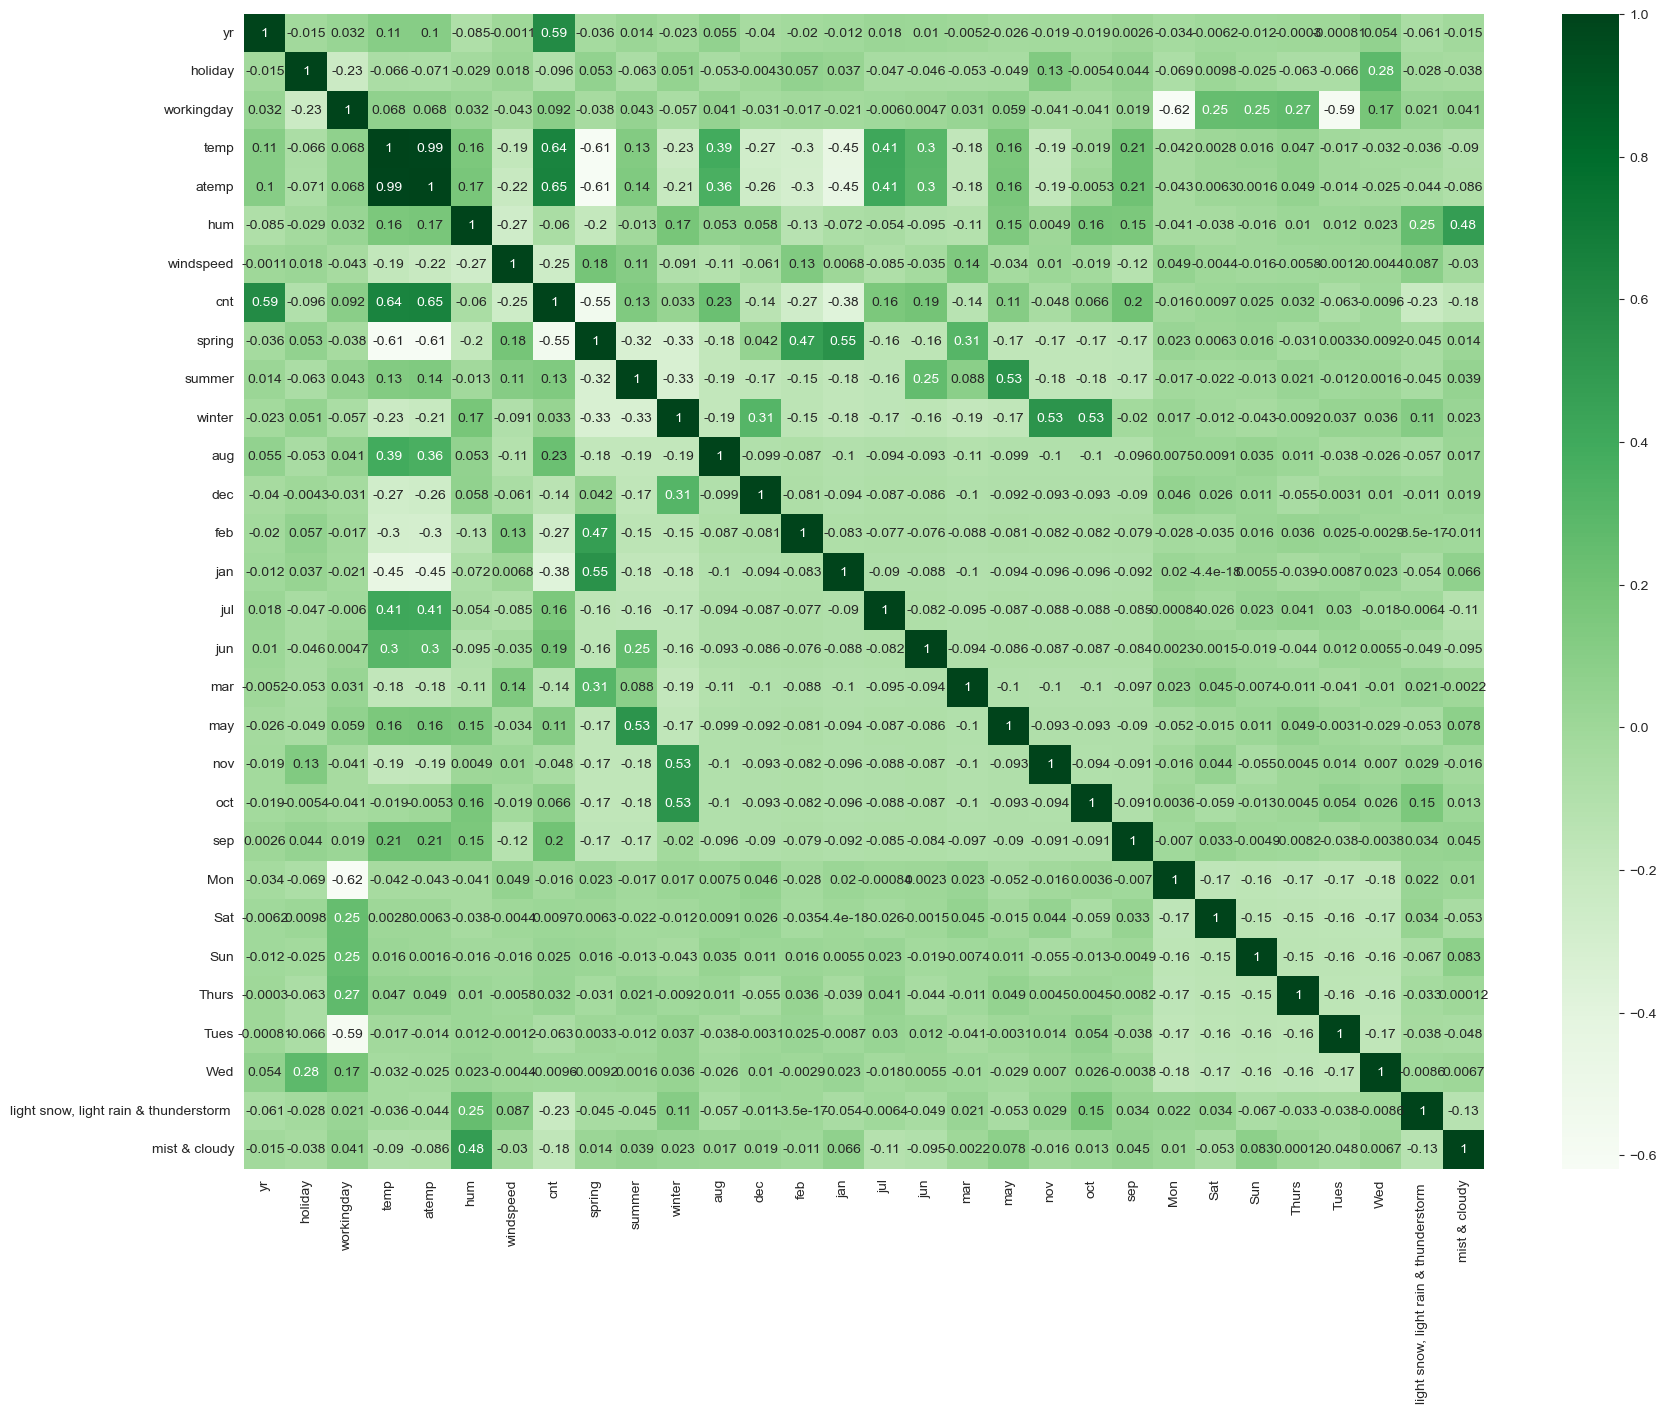

In [132]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

### Building the linear model

In [134]:
y_train = df_train.pop('cnt')
X_train = df_train

In [135]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Get the top 15 predictors using the recursive feature elimination algorithm  
rfe = RFE(lm, n_features_to_select=14)
rfe = rfe.fit(X_train, y_train)

In [136]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 16),
 ('may', False, 7),
 ('nov', False, 4),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thurs', False, 10),
 ('Tues', True, 1),
 ('Wed', False, 9),
 ('light snow, light rain & thunderstorm ', True, 1),
 ('mist & cloudy', True, 1)]

In [137]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'jul', 'sep', 'Mon', 'Tues',
       'light snow, light rain & thunderstorm ', 'mist & cloudy'],
      dtype='object')

In [138]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may',
       'nov', 'oct', 'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

### For each model we will consider p value less or equal to 0.05 & VIF less or equal to 5

### Model 1

In [141]:
X_train_rfe = X_train[col]

In [142]:
X_train_lm = sm.add_constant(X_train_rfe)

In [143]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [144]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.81e-190
Time:                        22:12:58   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [145]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                               workingday  40.71
10                                     Mon   9.93
11                                    Tues   9.64
3                                     temp   2.99
6                                   spring   2.55
1                                  holiday   2.54
4                                      hum   1.89
7                                   winter   1.78
13                           mist & cloudy   1.57
8                                      jul   1.30
12  light snow, light rain & thunderstorm    1.25
5                                windspeed   1.17
9                                      sep   1.11
0                                       yr   1.03

### Model 2: Remove the holiday predictor as it has high p value

In [147]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [148]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.81e-190
Time:                        22:12:58   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [149]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                                      hum  29.19
2                                     temp  17.24
1                               workingday  16.92
9                                      Mon   4.57
4                                windspeed   4.52
10                                    Tues   4.45
5                                   spring   2.79
12                           mist & cloudy   2.27
6                                   winter   2.15
0                                       yr   2.08
7                                      jul   1.40
11  light snow, light rain & thunderstorm    1.23
8                                      sep   1.21

### Model 3: Remove the humidity predictor as it has high VIF

In [151]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [152]:
X_train_lm_2 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.38e-188
Time:                        22:12:58   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [153]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                               workingday  13.12
2                                     temp  12.38
3                                windspeed   4.48
8                                      Mon   3.76
9                                     Tues   3.53
4                                   spring   2.44
0                                       yr   2.07
5                                   winter   1.78
11                           mist & cloudy   1.57
6                                      jul   1.37
7                                      sep   1.20
10  light snow, light rain & thunderstorm    1.08

### Model 4: Remove the workingday predictor as it has high VIF

In [155]:
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)

In [156]:
X_train_lm_3 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          7.06e-186
Time:                        22:12:58   Log-Likelihood:                 495.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [157]:
# Calculate the VIFs for the  model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                     temp  4.72
2                                windspeed  4.04
0                                       yr  2.06
3                                   spring  1.66
10                           mist & cloudy  1.51
4                                   winter  1.41
5                                      jul  1.35
7                                      Mon  1.22
6                                      sep  1.20
8                                     Tues  1.20
9   light snow, light rain & thunderstorm   1.08

### Model 5: Remove the Monday predictor as it has high p value

In [159]:
X_train_rfe = X_train_rfe.drop(["Mon"], axis = 1)

In [160]:
X_train_lm_4 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.06e-186
Time:                        22:12:58   Log-Likelihood:                 494.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [161]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X =X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                    temp  4.67
2                               windspeed  4.00
0                                      yr  2.06
3                                  spring  1.65
9                           mist & cloudy  1.51
4                                  winter  1.40
5                                     jul  1.35
6                                     sep  1.20
7                                    Tues  1.17
8  light snow, light rain & thunderstorm   1.08

### Residual Analysis of the train data|

In [163]:
y_train_predict = lm.predict(X_train_lm_4)

##### It's clear from the below graph that errors are normalized.

Text(0.5, 0, 'Errors')

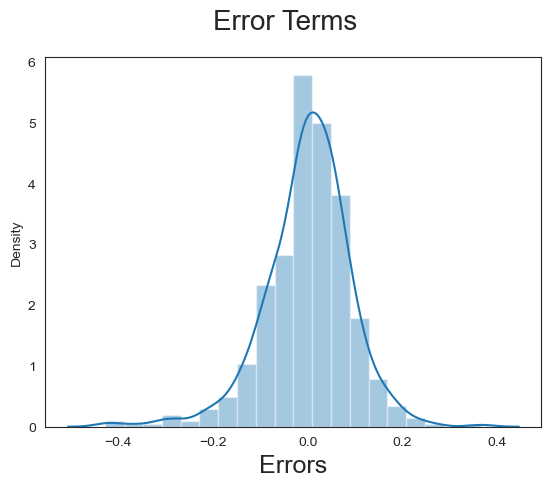

In [165]:
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)     

### Verify that the variance of the error terms is Homoscedasticity i.e. the spread of residuals should be constant for all values of X

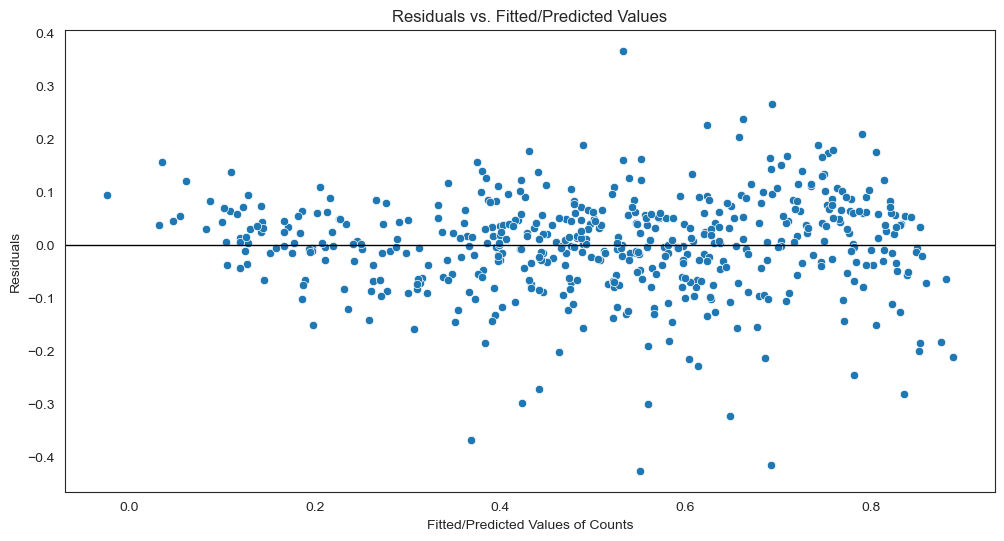

In [167]:
# Create a scatter plot between the fitted values of 'count' and the residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train_predict, y=lm.resid)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1, color='black')
plt.xlabel('Fitted/Predicted Values of Counts')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted/Predicted Values');

### Create a scatter plot between the fitted and actual values of 'count' using training data. **Below graph confirms that it is linear**

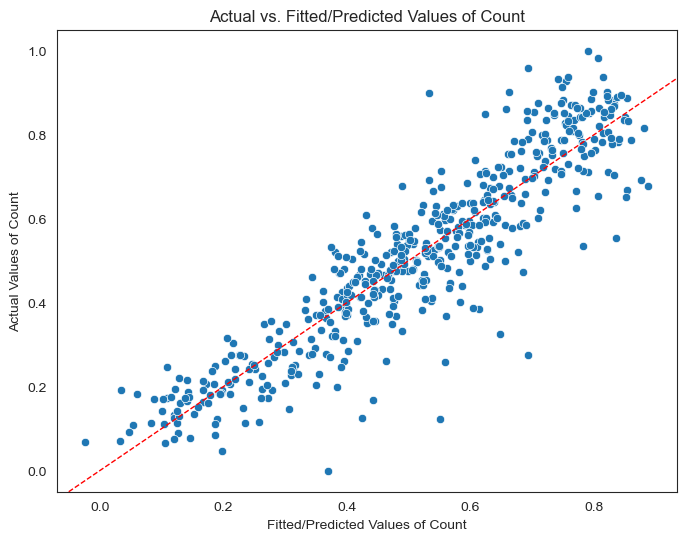

In [169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_predict, y=y_train)
plt.axline((0, 0), slope=1, linestyle='--', linewidth=1, color='red')
plt.xlabel('Fitted/Predicted Values of Count')
plt.ylabel('Actual Values of Count')
plt.title('Actual vs. Fitted/Predicted Values of Count');

## Making Predictions Using the Final Model

#### Apply scaling to all the columns except the 'yes-no' and 'dummy' variables on the test data

In [172]:
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [173]:
# Verify the values of the test data
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt      spring      summer  ...         oct  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.255708    0.264840  ...    0.082192   
std      0.159947    0.218435    0.437258    0.442259  ...    0.275286   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    1.000000    1.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              sep         Mon         Sat         Sun       Thurs        Tues  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.164384    0.178082    0.164384    0.146119   
std      0.282125    0.324202    0.371472    0.383458    0.371472    0.354034   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  light snow, light rain & thunderstorm   mist & cloudy  
count  219.000000                              219.000000     219.000000  
mean     0.127854                                0.027397       0.319635  
std      0.334692                                0.163612       0.467403  
min      0.000000                                0.000000       0.000000  
25%      0.000000                                0.000000       0.000000  
50%      0.000000                                0.000000       0.000000  
75%      0.000000                                0.000000       1.000000  
max      1.000000                                1.000000       1.000000  

[8 rows x 30 columns]

#### Dividing into X_test and y_test

In [175]:
y_test = df_test.pop('cnt')
X_test = df_test

In [176]:
X_test_new = X_test[X_train_rfe.columns]

In [177]:
X_test_new = sm.add_constant(X_test_new)

In [178]:
y_test_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

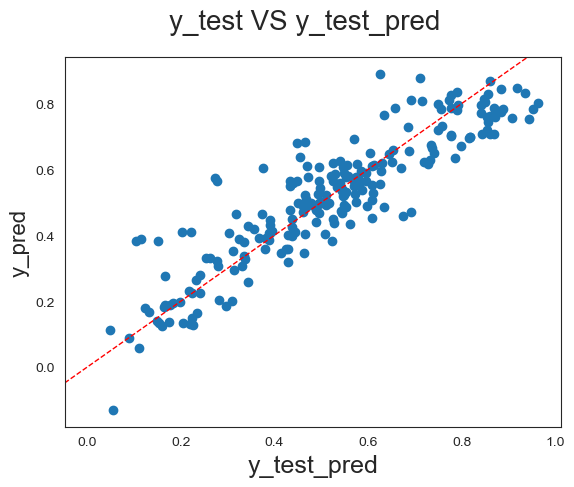

In [180]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test VS y_test_pred', fontsize = 20)
plt.axline((0, 0), slope=1, linestyle='--', linewidth=1, color='red')
plt.xlabel('y_test_pred', fontsize = 18)     
plt.ylabel('y_pred', fontsize = 16)  

#### Calculate R square

In [182]:
print(f' Train data R square value :: {round(r2_score(y_true=y_train, y_pred=y_train_predict), 2)}')
print(f' Test data R square value :: {round(r2_score(y_true=y_test, y_pred=y_test_pred), 2)}')

 Train data R square value :: 0.83
 Test data R square value :: 0.81


#### Calculate Adjusted R square

In [184]:
n = X_test.shape[0]
p = X_test.shape[1]

In [185]:
r2=0.81
test_adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),2)

In [186]:
n = X_train.shape[0]
p = X_train.shape[1]

In [187]:
r2=0.83
train_adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),2)

In [188]:
print(f' Train data Adjusted R square value :: {train_adjusted_r2}')
print(f' Test data Adjusted R square value :: {test_adjusted_r2}')

 Train data Adjusted R square value :: 0.82
 Test data Adjusted R square value :: 0.78


#### The linear equation for the bike booking is shown below

### cnt=0.2574+0.2344×yr+0.4509×temp+0.0461×winter+0.0526×sep-0.1414×windspeed-0.1133×spring-0.0696×jul-0.0445×tues-0.2868×lightsnow-0.0811×mist

# Conclusion

- Temperature – A unit increase in Temperature predictor increases the Bike booking numbers by 0.4509 unit
- Year – A unit increase in Year predictor increases the Bike booking numbers by 0.2344 unit
- Winter – A unit increase in winter predictor increases the Bike booking numbers by 0.0461 unit
- September – A unit increase in september predictor increases the Bike booking numbers by 0.0526 unit
- Windspeed – A unit increase in windspeed predictor decreases the Bike booking numbers by 0.1414 unit
- Spring – A unit increase in spring predictor decreases the Bike booking numbers by 0.1133 unit
- July - A unit increase in july predictor decreases the Bike booking numbers by 0.0696 unit
- Tuesday - A unit increase in tuesday predictor decreases the Bike booking numbers by 0.0445 unit
- Weather Situation - light snow, light rain & thunderstorm - A unit increase in this weather situation predictor decreases the Bike booking numbers by 0.2868 unit
- Mist - A unit increase in mist predictor decreases the Bike booking numbers by 0.0811 unit